In [1]:
import numpy as np
import matplotlib
import pylab as plt
import pandas as pd


%matplotlib inline

In [2]:
h=6.6e-34
c=3e8


In [3]:
HyperFine=21e-2
delW=c/HyperFine
print(delW)

1428571428.5714285


In [4]:

HyperFine=21e-2
delW=c/HyperFine
gI=5.585
ge=2
gL=1
gS=2
L=0
S=0.5
I=0.5
J=0.5
mue=9.27e-24
mN=1e9
me=5.11e5
muN=mue*me/mN

In [5]:
B=np.linspace(0,1,1000)

In [6]:
def PlotHyperfineLevels(pm,mF,delW=1.428e9,I=0.5,L=0,J=0.5,mN=1,gI=5.585,ge=2.02):
    h=6.6e-34
    c=3e8
    S=0.5
    mue=9.27e-24
    me=5.11e5
    muN=mue*me/(1e9*mN)

    gJ=gL*(J*(J+1)+L*(L+1)-S*(S+1))/(2*J*(J+1))  +ge*(J*(J+1)-L*(L+1)+S*(S+1))/(2*J*(J+1))
    
    x=B*(gJ*mue-gI*muN)/(h *delW)
    Term1=-h*delW/(2*(2*I+1))*np.ones_like(B)
    Term2=muN*gI*mF*B
    if(abs(mF)==abs(I+0.5)):
        sgn=mF/(I+0.5)
        Term3=h*delW/2*(1+sgn*x)
    else:    
        Term3=pm*h*delW/2*np.sqrt(1+2*mF*x/(I+0.5)+x**2)

    delE=(Term1+Term2+Term3)/h
    
    return delE

Text(0.5, 0, 'B (T)')

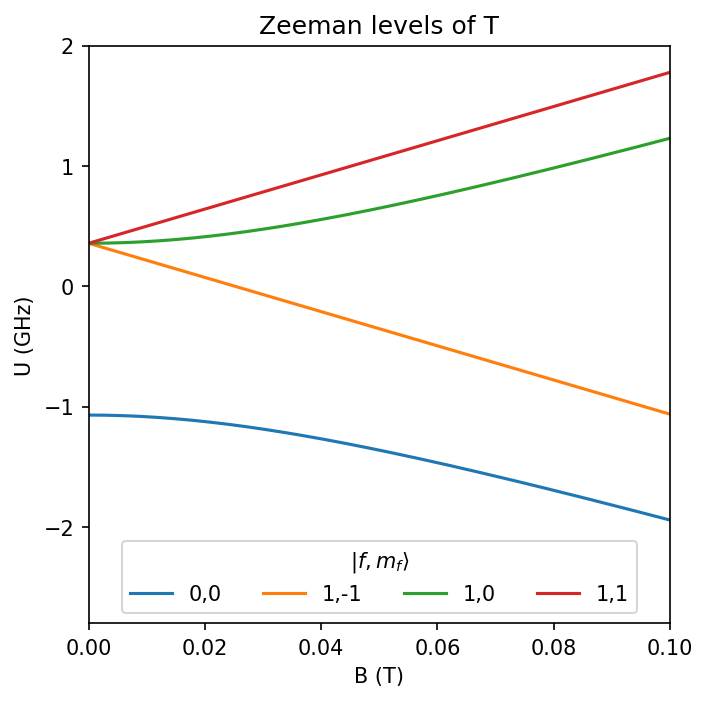

In [7]:

cols=['DarkRed','DarkBlue','purple','black']
plt.figure(figsize=(5,5),dpi=150)
I=0.5
ct=0
for pm in [-1,1]:
    F=I+pm*0.5
    for mF in np.arange(-F,F+1,1):

        delE=PlotHyperfineLevels(pm,mF,delW=1.428e9,I=0.5,L=0,J=0.5,mN=1,gI=5.585,ge=2.02)
        plt.plot(B,delE/1e9,label=str(int(F))+","+str(int(mF)))

    
        ct=ct+1

plt.xlim(0,0.1)
plt.ylim(-2.8,2)
plt.title(r"Zeeman levels of T")
plt.legend(loc='lower center',ncol=4,title=r'$|f,m_f\rangle$' )
plt.ylabel("U (GHz)")
plt.xlabel("B (T)")

In [8]:
kB=8.617e-5
(7.5e9*h/1.6e-19/kB*2)

0.7180573285366137

In [9]:
B=np.linspace(0,0.02,1000)

Text(0.5, 0, 'B (G)')

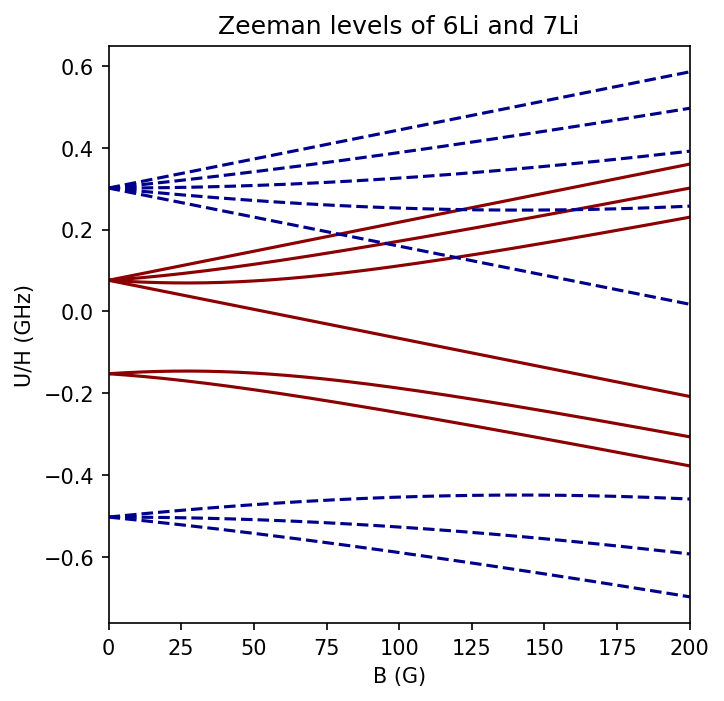

In [10]:
plt.figure(figsize=(5,5),dpi=150)
I=1
for pm in [-1,1]:
    F=I+pm*0.5
    for mF in np.arange(-F,F+1,1):
        delE=PlotHyperfineLevels(pm,mF,delW=228.205e6,I=1,L=0,J=0.5,mN=6,gI=0.821,ge=2.02)
        plt.plot(B*1e4,delE/1e9,label=str(F)+","+str(mF),color='DarkRed')

I=3/2
for pm in [-1,1]:
    F=I+pm*0.5
    for mF in np.arange(-F,F+1,1):        
        delE=PlotHyperfineLevels(pm,mF,delW=803.503e6,I=3/2,L=0,J=0.5,mN=7,gI=2.170,ge=2.02)                                 
        plt.plot(B*1e4,delE/1e9,'--',label=str(F)+","+str(mF),color='DarkBlue')                                 

plt.title("Zeeman levels of 6Li and 7Li")

       
#plt.show()
plt.xlim(0,200)
#plt.ylim(-1,2)
#plt.legend(loc='lower left',title=r'F, m$_F$',ncol=2,fontsize=9)
plt.ylabel("U/H (GHz)")
plt.xlabel("B (G)")

(-2.8, 2.0)

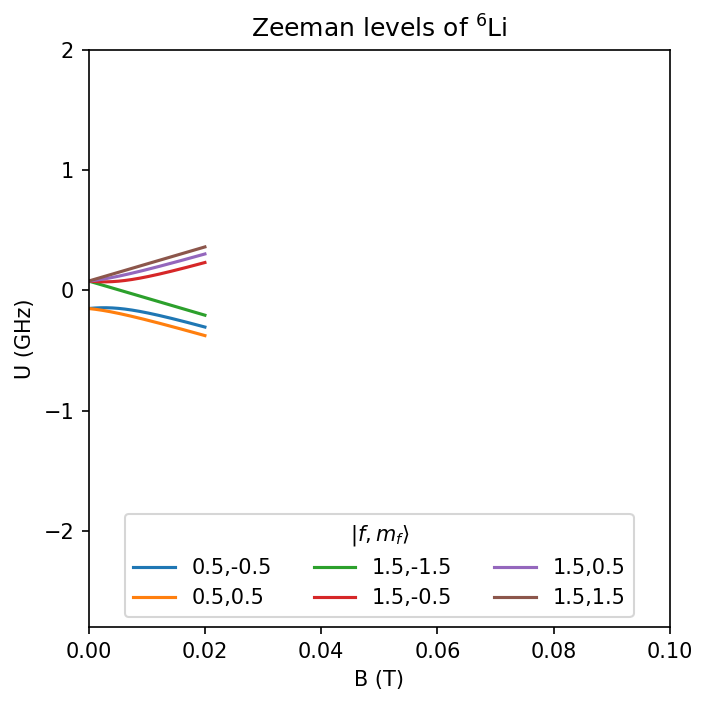

In [11]:
I=1
plt.figure(figsize=(5,5),dpi=150)
for pm in [-1,1]:
    F=I+pm*0.5
    for mF in np.arange(-F,F+1,1):
        delE=PlotHyperfineLevels(pm,mF,delW=228.205e6,I=1,L=0,J=0.5,mN=6,gI=0.821,ge=2.02)
        plt.plot(B,delE/1e9,label=str(F)+","+str(mF))
        
plt.xlim(0,0.1)
#plt.ylim(-2.8,2)
plt.title(r"Zeeman levels of $^6$Li")
plt.legend(loc='lower center',ncol=3,title=r'$|f,m_f\rangle$' )

plt.ylabel("U (GHz)")
plt.xlabel("B (T)")
plt.ylim(-2.8,2)

In [12]:

delW=228.205e6
NuclearSpin=1
gI=0.821
ge=2.02
gL=1
gS=2
L=0
S=0.5
I=1
J=0.5
mue=9.27e-24
mN=6
me=5.11e5
muN=mue*me/mN

Text(0.5, 0, 'B (T)')

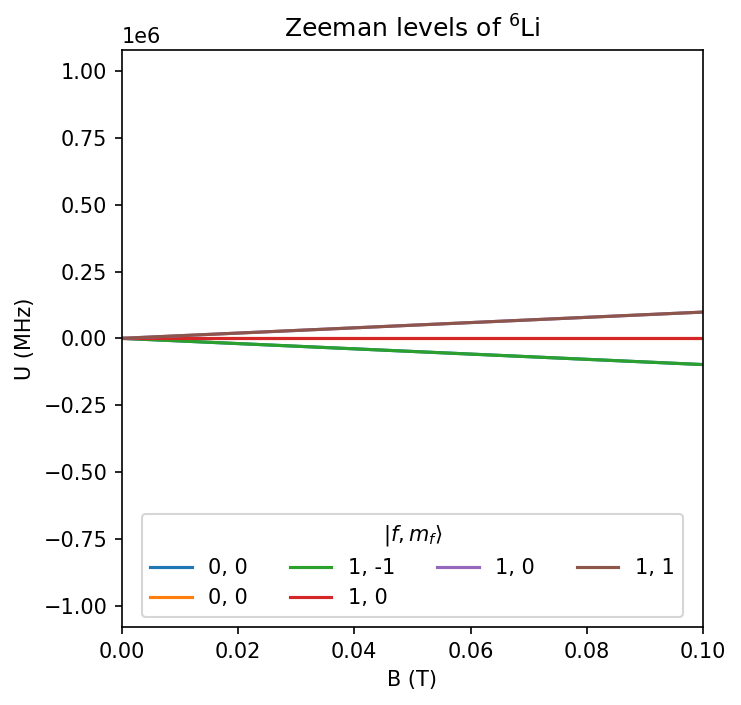

In [13]:
plt.figure(figsize=(5,5),dpi=150)

B=np.linspace(0,1,1000)
for pm in [-1,1]:
    F=I+pm*0.5
    for mF in np.arange(-F,F+1,1):
        #if(F!=0):
        gJ=gL*(J*(J+1)+L*(L+1)-S*(S+1))/(2*J*(J+1))  +gS*(J*(J+1)-L*(L+1)+S*(S+1))/(2*J*(J+1))
        #else:
        #    gJ=gL*(J*(J+1)+L*(L+1)-S*(S+1))/(2*J*(J+1))  

        x=B*(gJ*mue-gI*muN)/(h *delW)
        Term1=-h*delW/(2*(2*I+1))*np.ones_like(B)
        Term2=muN*gI*mF*B
        if(abs(mF)==abs(I+0.5)):
            sgn=mF/(I+0.5)
            Term3=h*delW/2*(1+sgn*x)
        else:    
            Term3=pm*h*delW/2*np.sqrt(1+2*mF*x/(I+0.5)+x**2)

        delE=(Term1+Term2+Term3)/h
        #plt.plot(B,Term1/(1e9*h),label='1')
        #plt.plot(B,Term2/(1e9*h),label='2')
        #plt.plot(B,Term3/(1e9*h),label='3')

        plt.plot(B,delE/1e9,label=str(int(F))+", "+str(int(mF)))


        #plt.show()
plt.xlim(0,0.1)
#plt.ylim(-2.8,2)
plt.title(r"Zeeman levels of $^6$Li")
plt.legend(loc='lower center',ncol=4,title=r'$|f,m_f\rangle$' )
plt.ylabel("U (MHz)")
plt.xlabel("B (T)")